In [2]:
# Install a pip package in the current Jupyter kernel - https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
import sys
# !{sys.executable} -m pip install python-dev-tools librosa matplotlib magenta
!{sys.executable} -m pip install python-dev-tools librosa matplotlib umap-learn
# !{sys.executable} -m pip install llvmlite
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install magenta
# !{sys.executable} -m pip install umap-learn==0.2.5

# !{sys.executable} -m pip install tensorflow-metal tensorflow-macos
# !{sys.executable} -m pip install umap-learn
sys.path.append('.')


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


All the relevant imports we'll need!

You'll need to install magenta!

In [3]:
import os
import csv
import umap
import json
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
# from magenta.models.nsynth import utils
# from magenta.models.nsynth.wavenet import fastgen

np.random.seed(8)

/Users/bjornpjo/Developer/apps/kromosynth-evaluate/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Here we get all the mfccs and wavenet state data and save it to be dimensionally reduced. You can download the model weights from: http://download.magenta.tensorflow.org/models/nsynth/wavenet-ckpt.tar

In [4]:
# def wavenet_encode(file_path):
#     neural_sample_rate = 16000
#     audio = utils.load_audio(file_path, 
#                              sample_length=400000, 
#                              sr=neural_sample_rate)
#     encoding = fastgen.encode(audio, './wavenet-ckpt/model.ckpt-200000', len(audio))
#     return encoding.reshape((-1, 16))


banned_words = ['Loop', 'Drumloop', 'Breakbeat']
# directory = '/Users/bjornpjo/Downloads/test-sounds/'
directory = '/Users/bjornpjo/Documents/MCT/MCT4052-79d7e16aaa8bdbfafa6205bd1f4acebb3ba59b44/notebooks/workshops/data/examples2/'
dataset = []
errors = 0
        
sample_rate = 44100
mfcc_size = 13

for file in os.listdir(directory):
    
    contains_banned = [word in file for word in banned_words]

    if file.endswith('.wav') and not np.any(contains_banned):
        file_path = os.path.join(directory, file)
        
        try:
            # wavenet_data = wavenet_encode(file_path)
        
            # stddev_wavenet = np.std(wavenet_data, axis=0)

            # mean_wavenet = np.mean(wavenet_data, axis=0)

            # average_difference_wavenet = np.zeros((16,))
            # for i in range(0, len(wavenet_data) - 2, 2):
            #     average_difference_wavenet += wavenet_data[i] - wavenet_data[i+1]
            # average_difference_wavenet /= (len(wavenet_data) // 2)   
            # average_difference_wavenet = np.array(average_difference_wavenet)

            # concat_features_wavenet = np.hstack((stddev_wavenet, mean_wavenet))
            # concat_features_wavenet = np.hstack((concat_features_wavenet, average_difference_wavenet))

            data, _ = librosa.load(file_path)

            trimmed_data, _ = librosa.effects.trim(y=data)

            # mfccs = librosa.feature.mfcc(trimmed_data, 
            #                              sample_rate, 
            #                              n_mfcc=mfcc_size)
            mfccs = librosa.feature.mfcc(y=trimmed_data, 
                             sr=sample_rate, 
                             n_mfcc=mfcc_size)

            stddev_mfccs = np.std(mfccs, axis=1)

            mean_mfccs = np.mean(mfccs, axis=1)

            average_difference = np.zeros((mfcc_size,))
            for i in range(0, len(mfccs.T) - 2, 2):
                average_difference += mfccs.T[i] - mfccs.T[i+1]
            average_difference /= (len(mfccs) // 2)   
            average_difference = np.array(average_difference)

            concat_features = np.hstack((stddev_mfccs, mean_mfccs))
            concat_features = np.hstack((concat_features, average_difference))
            print(concat_features.shape)
            
            dataset += [(file, 
                        #  concat_features_wavenet, 
                         concat_features)]
        
        except:
            print("error!")
            errors += 1
        
print('errors:', errors)

(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,)
(39,

This is some specific code to prep the data for plotting and to be saved to json for the html visualisation

In [5]:
all_file_paths, mfcc_features = zip(*dataset)
# wavenet_features, 
    
# wavenet_features = np.nan_to_num(np.array(wavenet_features))
mfcc_features = np.array(mfcc_features)

mfcc_tuples = []
wavenet_tuples = []

all_json = dict()
all_json["filenames"] = all_file_paths

print(len(all_file_paths), 
      # wavenet_features.shape, 
      mfcc_features.shape)

167 (167, 39)


Making and plotting the t-SNE embeddings!

In [23]:
def get_scaled_tsne_embeddings(features, perplexity, iteration):
    embedding = TSNE(n_components=2,
                     perplexity=perplexity,
                     n_iter=iteration).fit_transform(features)
    scaler = MinMaxScaler()
    scaler.fit(embedding)
    return scaler.transform(embedding)


def transform_numpy_to_json(array):
    data = []
    for position in array:
        data.append({
            'coordinates': position.tolist()
        })
    return data


tnse_embeddings_mfccs = []
# tnse_embeddings_wavenet = []
perplexities = [2, 5, 30, 50, 100]
# iterations = [200, 500, 1000, 2000, 5000]
iterations = [500, 1000, 2000, 5000]
for i, perplexity in enumerate(perplexities):
    for j, iteration in enumerate(iterations):
        tsne_mfccs = get_scaled_tsne_embeddings(mfcc_features,
                                                perplexity,
                                                iteration)
        # tnse_wavenet = get_scaled_tsne_embeddings(wavenet_features,
        #                                           perplexity,
        #                                           iteration)
        tnse_embeddings_mfccs.append(tsne_mfccs)
        # tnse_embeddings_wavenet.append(tnse_wavenet)
        
        mfcc_key = 'tsnemfcc{}{}'.format(i, j) 
        wavenet_key = 'tsnewavenet{}{}'.format(i, j) 
        
        all_json[mfcc_key] = transform_numpy_to_json(tsne_mfccs)
        # all_json[wavenet_key] = transform_numpy_to_json(tnse_wavenet)

ValueError: perplexity must be less than n_samples

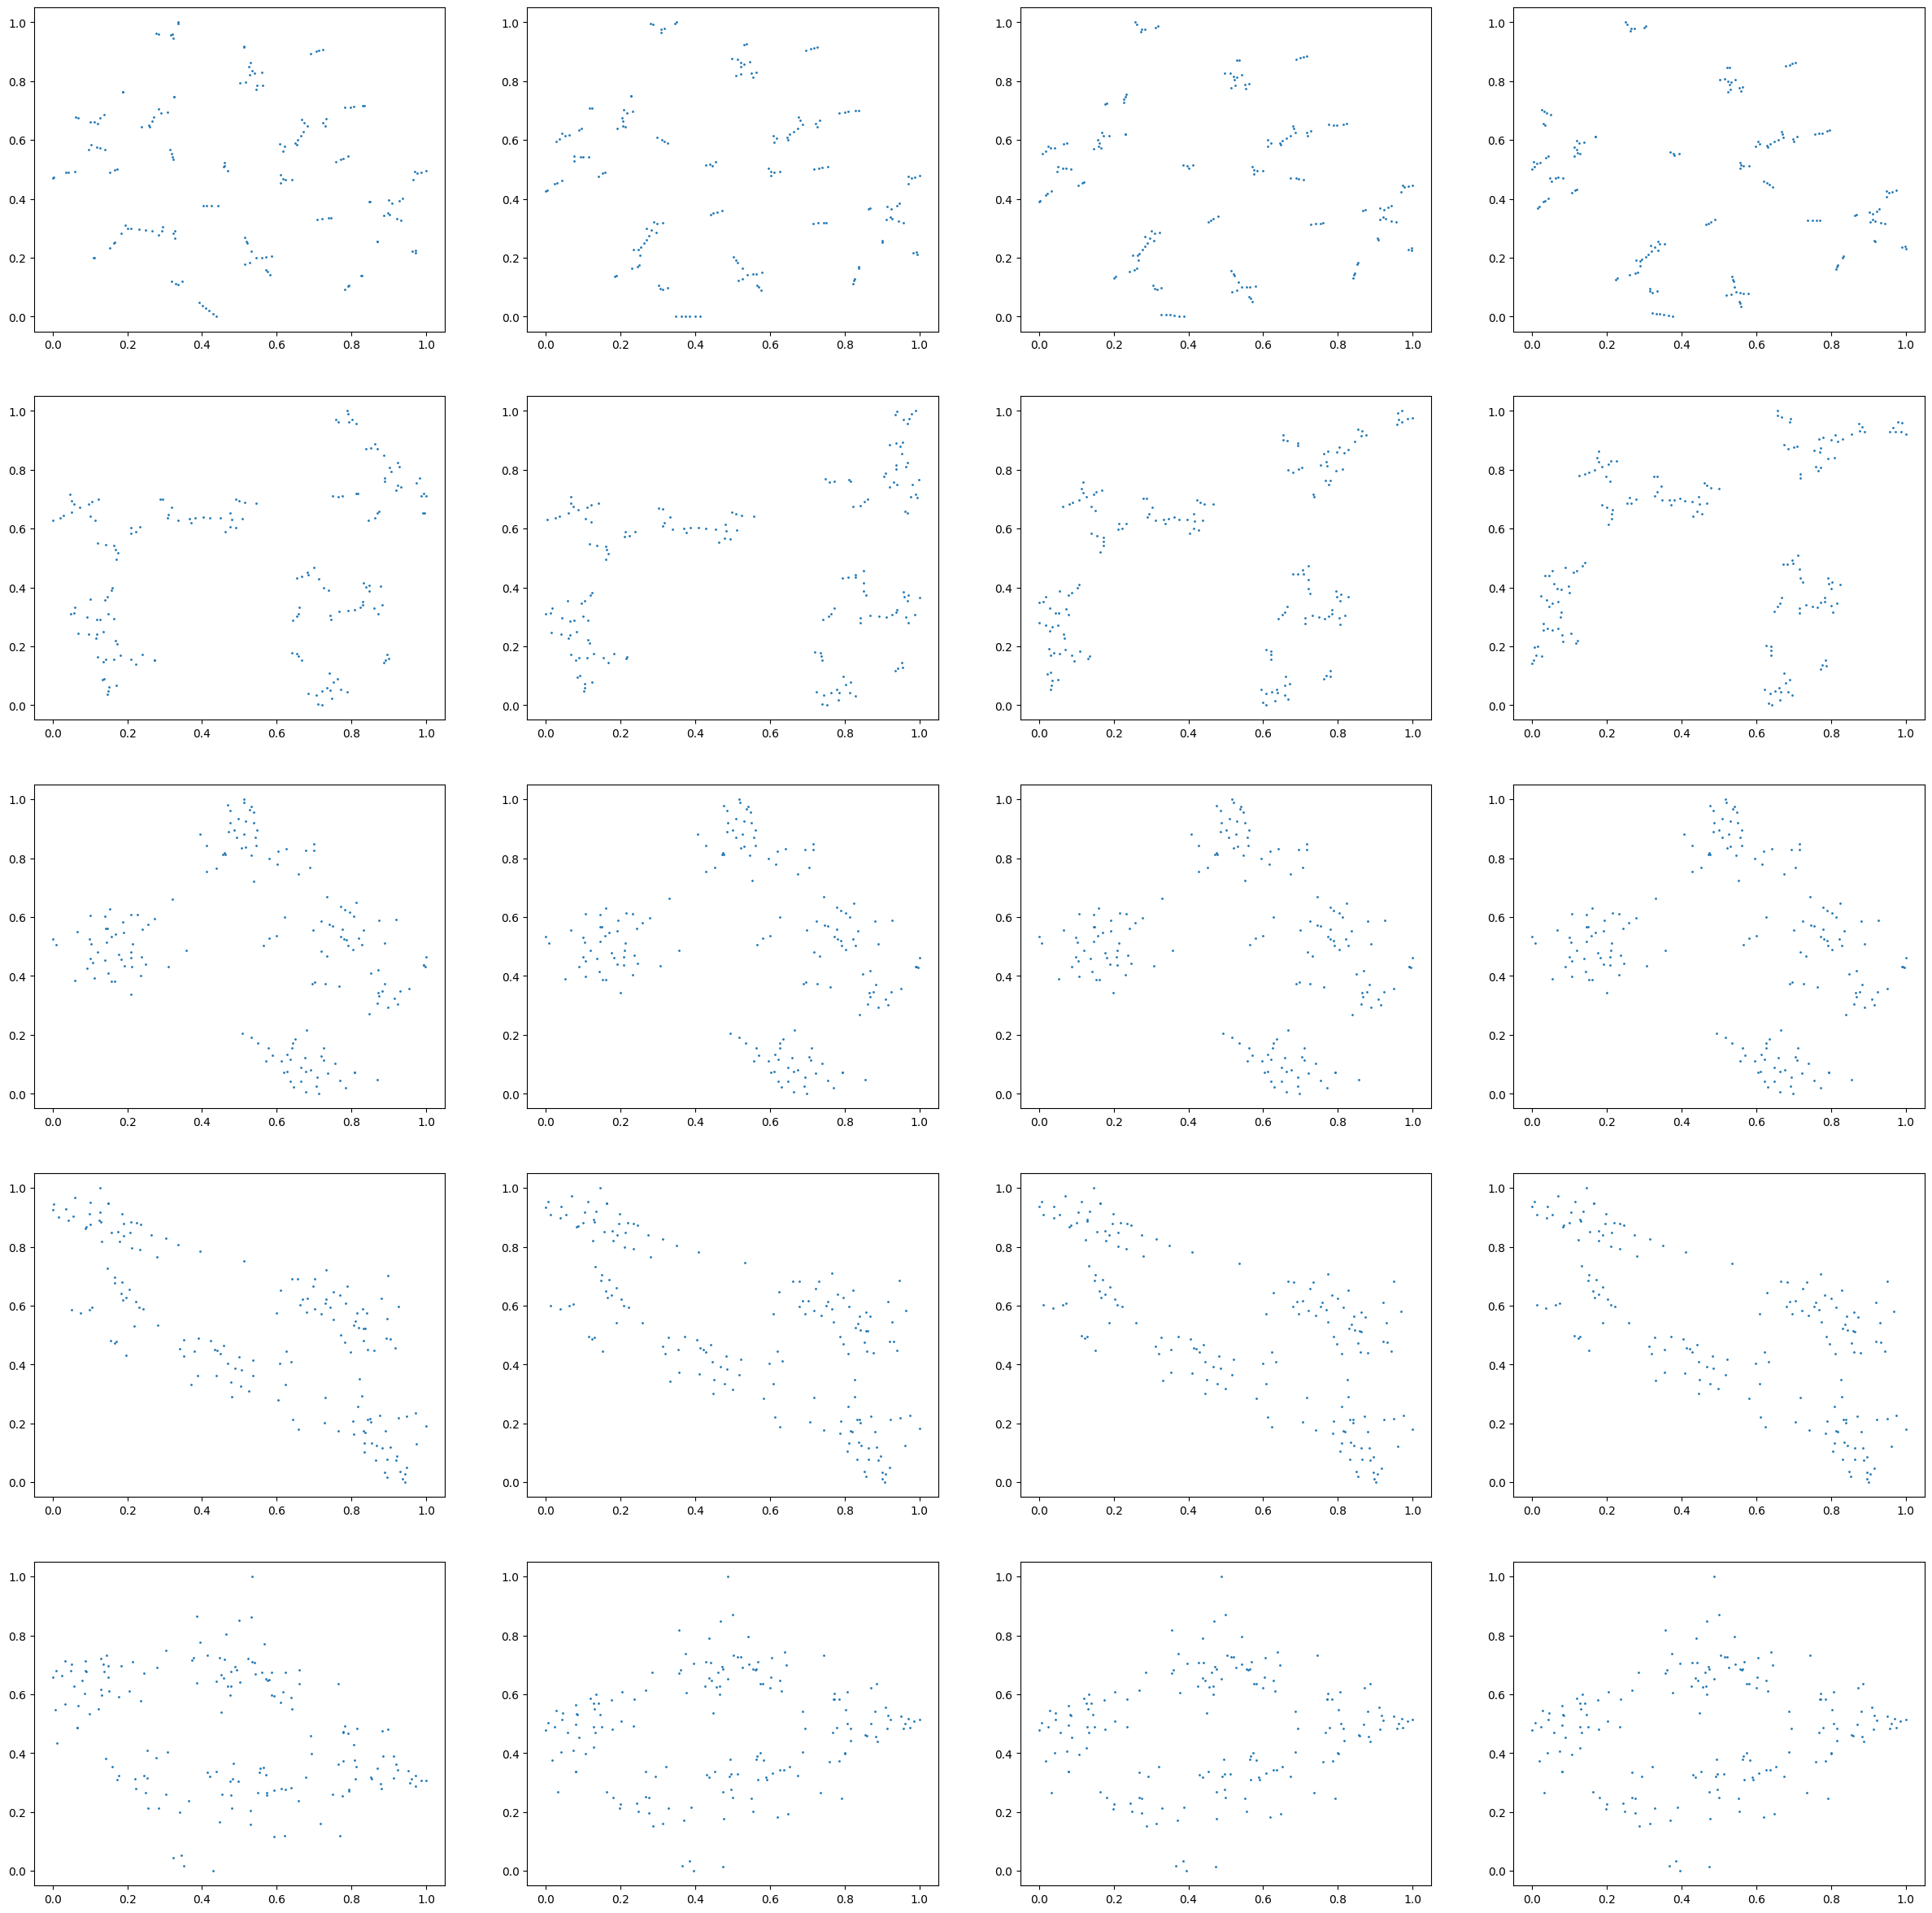

In [13]:
fig, ax = plt.subplots(nrows=len(perplexities), 
                       ncols=len(iterations),
                       figsize=(30, 30))

for i, row in enumerate(ax):
    for j, col in enumerate(row):
        current_plot = i * len(iterations) + j
        col.scatter(tnse_embeddings_mfccs[current_plot].T[0], 
                    tnse_embeddings_mfccs[current_plot].T[1], 
                    s=1)
plt.show()

Here is the code to make and plot the UMAP embeddings!

In [28]:
def get_scaled_umap_embeddings(features, neighbour, distance):
    
    embedding = umap.UMAP(n_neighbors=neighbour,
                          min_dist=distance,
                          metric='correlation').fit_transform(features)
    scaler = MinMaxScaler()
    scaler.fit(embedding)
    return scaler.transform(embedding)


umap_embeddings_mfccs = []
# umap_embeddings_wavenet = []
neighbours = [5, 10, 15, 30, 50]
distances = [0.000, 0.001, 0.01, 0.1, 0.5]
for i, neighbour in enumerate(neighbours):
    for j, distance in enumerate(distances):
        umap_mfccs = get_scaled_umap_embeddings(mfcc_features,
                                                neighbour,
                                                distance)
        # umap_wavenet = get_scaled_umap_embeddings(wavenet_features,
        #                                           neighbour,
        #                                           distance)
        umap_embeddings_mfccs.append(umap_mfccs)
        # umap_embeddings_wavenet.append(umap_wavenet)
        
        mfcc_key = 'umapmfcc{}{}'.format(i, j) 
        # wavenet_key = 'umapwavenet{}{}'.format(i, j) 
        
        all_json[mfcc_key] = transform_numpy_to_json(umap_mfccs)
        # all_json[wavenet_key] = transform_numpy_to_json(umap_wavenet)

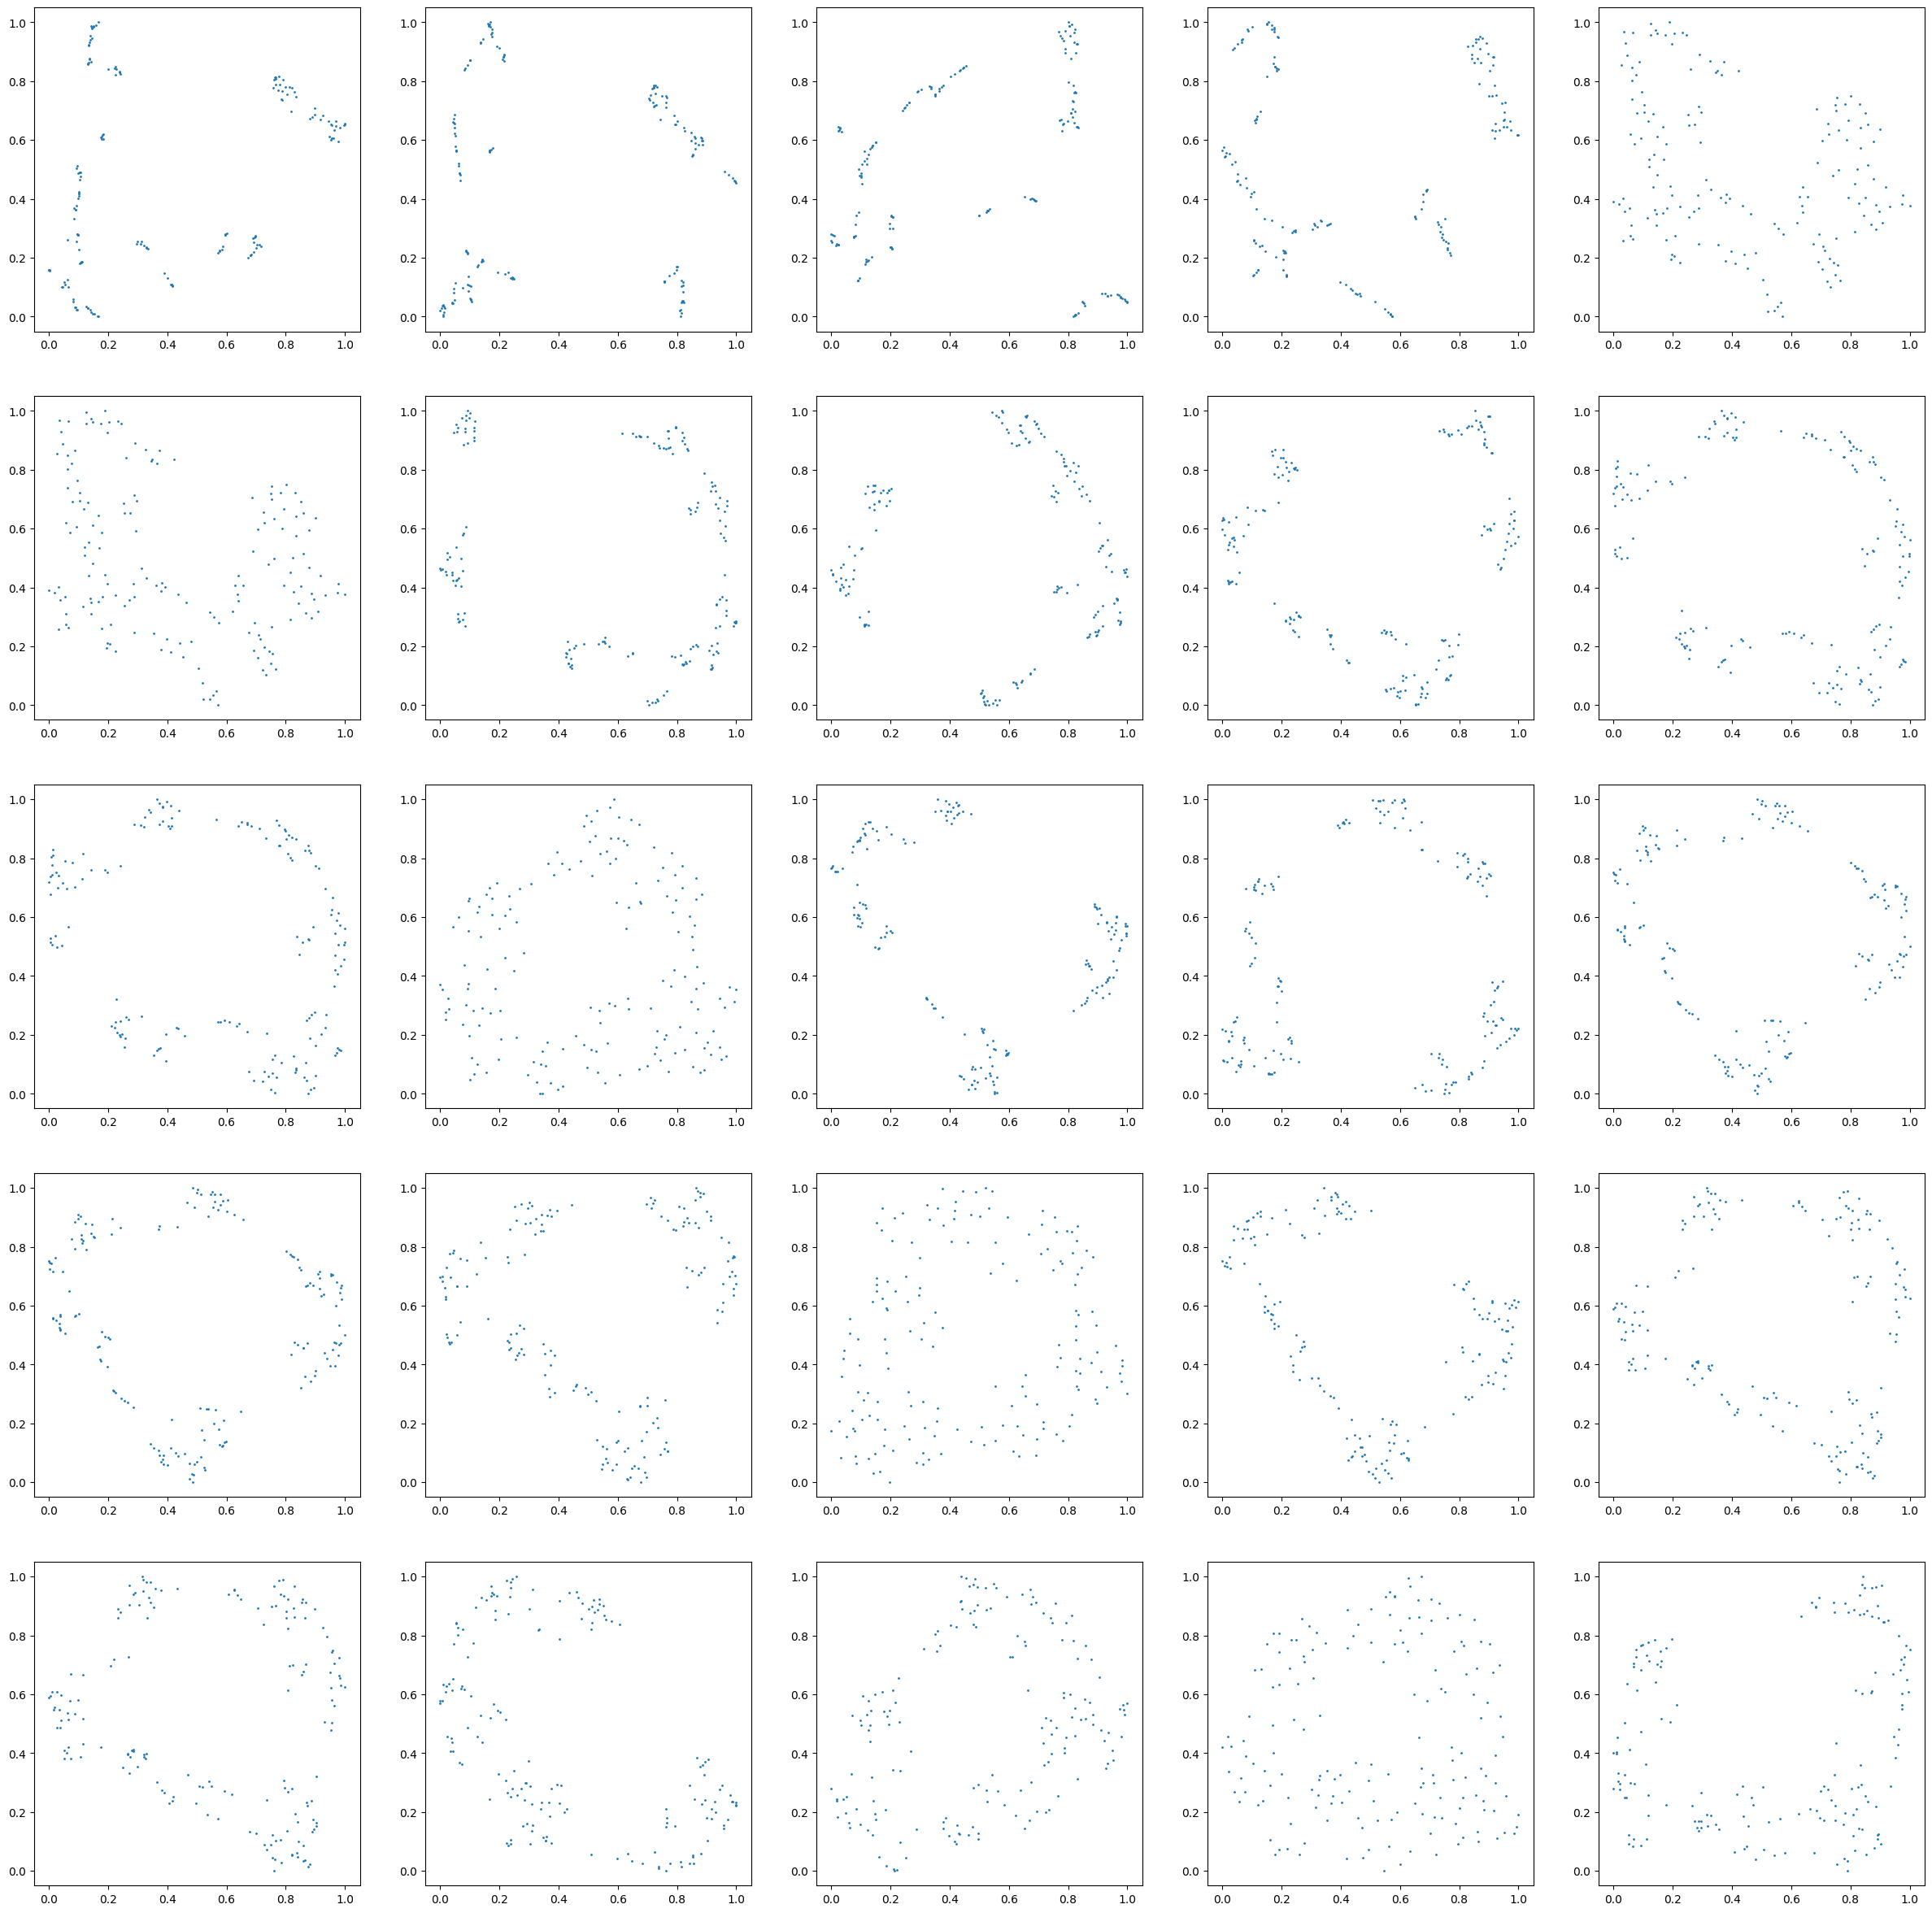

In [30]:
fig, ax = plt.subplots(nrows=len(neighbours), 
                       ncols=len(distances),
                       figsize=(30, 30))

for i, row in enumerate(ax):
    for j, col in enumerate(row):
        current_plot = i * len(iterations) + j
        col.scatter(umap_embeddings_mfccs[current_plot].T[0], 
                    umap_embeddings_mfccs[current_plot].T[1], 
                    s=1)
plt.show()

And last but not least, the PCA plots!

In [6]:
def get_pca(features):
    pca = PCA(n_components=3)
    transformed = pca.fit(features).transform(features)
    scaler = MinMaxScaler()
    scaler.fit(transformed)
    return scaler.transform(transformed)


print("mfcc_features:", mfcc_features)
print("mfcc_features.shape:", mfcc_features.shape)
pca_mfcc = get_pca(mfcc_features)
print("pca_mfcc:", pca_mfcc)
# pca_wavenet = get_pca(wavenet_features)

mfcc_key = 'pcamfcc'
# wavenet_key = 'pcawavenet' 

all_json[mfcc_key] = transform_numpy_to_json(pca_mfcc)
# all_json[wavenet_key] = transform_numpy_to_json(pca_wavenet)

mfcc_features: [[ 1.11969872e+02  8.97925091e+00  4.70348597e+00 ... -4.62974230e-01
  -1.19275530e-01  3.21126978e-01]
 [ 1.58592010e+02  3.14194317e+01  2.33175907e+01 ... -2.84833956e+00
  -2.08059533e+00 -2.56581275e+00]
 [ 1.58532349e+02  1.57404613e+01  8.37855339e+00 ... -2.08440904e+00
  -7.84105798e-01 -2.24312528e+00]
 ...
 [ 1.46314224e+02  2.91145382e+01  1.10994797e+01 ... -3.25499737e+00
  -1.67125154e+00 -2.10525775e+00]
 [ 1.24863892e+02  4.01461678e+01  1.25081644e+01 ...  1.47552252e+00
   1.62986457e+00  5.15868346e-01]
 [ 1.76720337e+02  3.31007385e+01  1.39160299e+01 ... -3.83761724e-02
  -1.34295269e+00 -1.33843040e+00]]
mfcc_features.shape: (167, 39)
pca_mfcc: [[0.00968669 0.30518277 0.54567271]
 [0.17954896 0.26587163 0.28303791]
 [0.10896953 0.4536637  0.41625795]
 [0.13757601 0.33525901 0.46726701]
 [0.40726702 0.33192474 0.218631  ]
 [0.22434862 0.2762597  0.47242131]
 [0.18512795 0.31586616 0.51059212]
 [0.18861224 0.27147537 0.3825483 ]
 [0.28850988 0.27121

NameError: name 'transform_numpy_to_json' is not defined

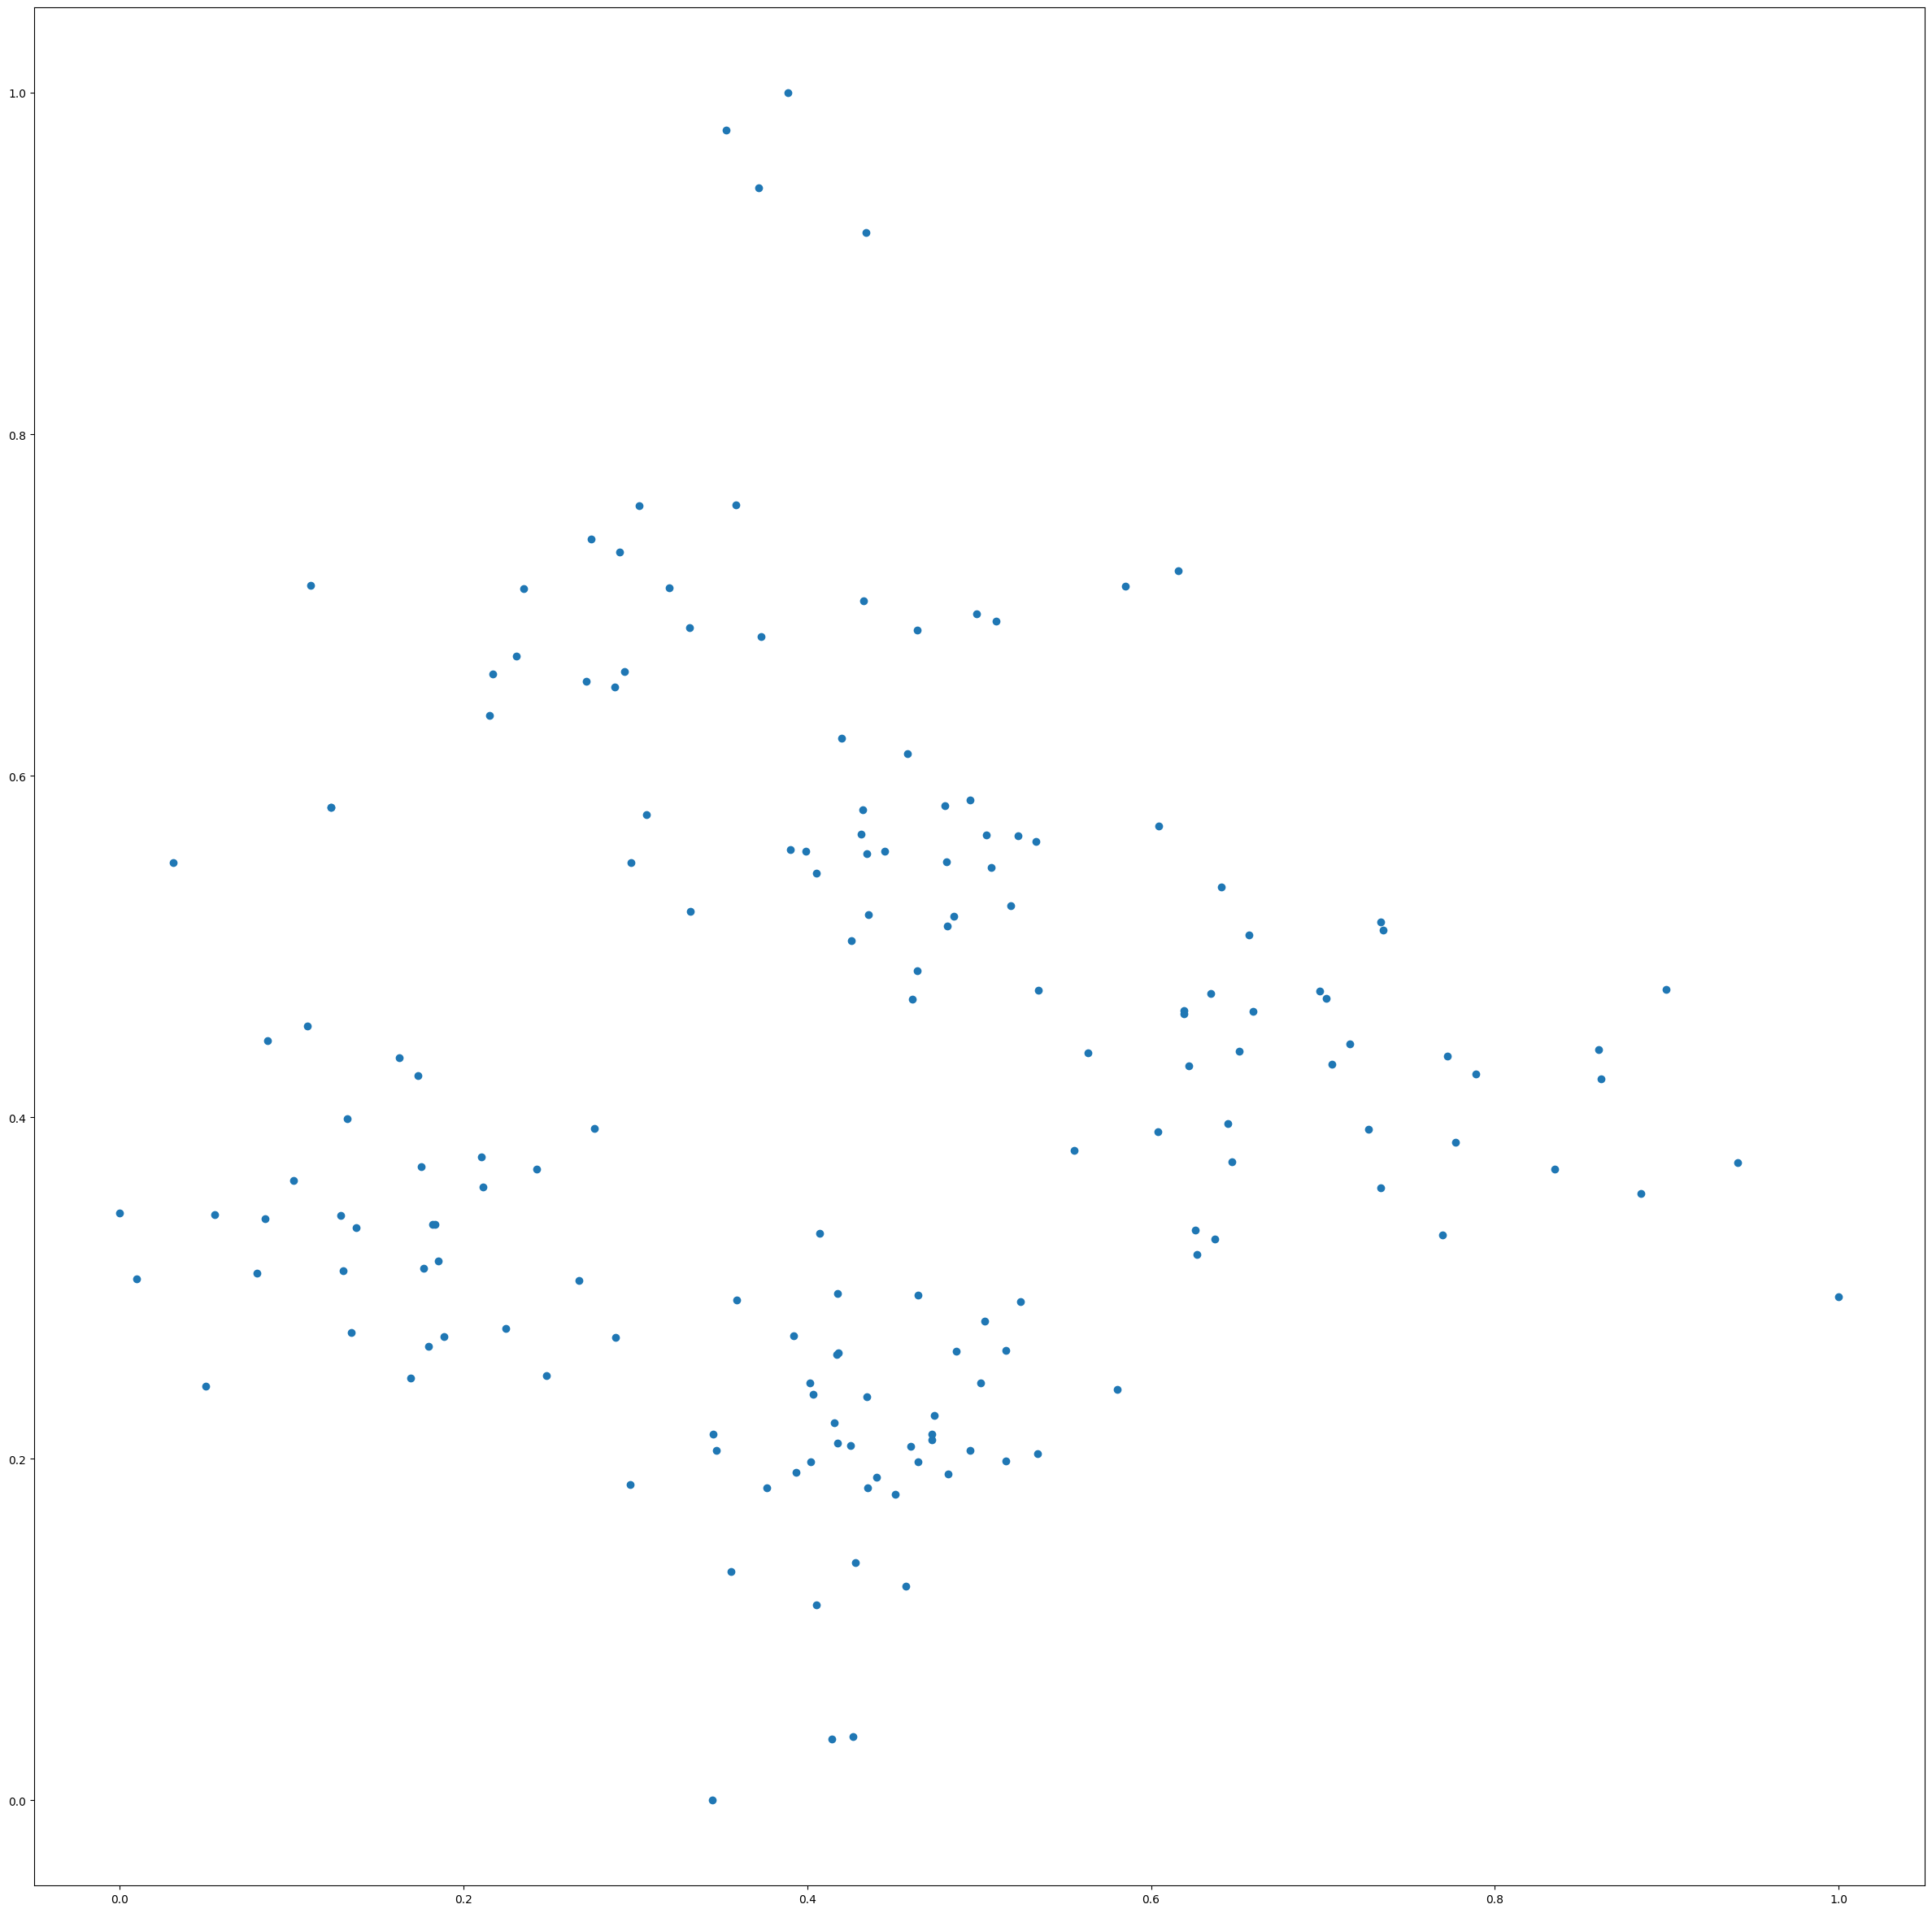

In [32]:
plt.figure(figsize=(30, 30))
_ = plt.scatter(pca_mfcc.T[0],
                pca_mfcc.T[1])
plt.show()

Its a bit weird but saving the data in this manner allows for synchrnous loading in a html file. 

In [ ]:
json_name = "data.json"
json_string = "d = '" + json.dumps(all_json) + "'"
with open(json_name, 'w') as json_file:
    json_file.write(json_string)